In [1]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image
from sklearn.linear_model import LinearRegression

In [2]:
image = cv.imread('./record/images/src3.png')
image.shape

(1080, 1439, 3)

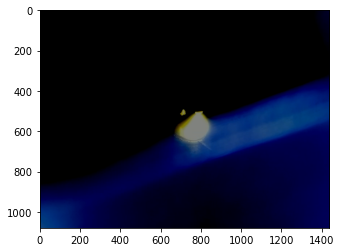

In [3]:
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)

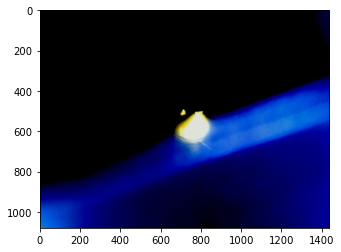

In [24]:
image_normalized = cv.normalize(image, None, 0, 255, cv.NORM_MINMAX)
plt.imshow(image_normalized)

(<matplotlib.axes._subplots.AxesSubplot at 0x15800413508>,
 <matplotlib.image.AxesImage at 0x158006095c8>)

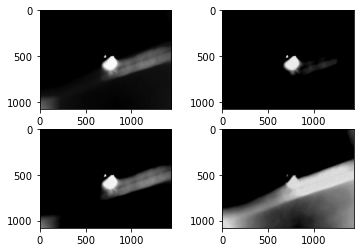

In [4]:
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
r, g, b = cv.split(image)
plt.subplot(2, 2, 1), plt.imshow(gray, 'gray')
plt.subplot(2, 2, 2), plt.imshow(r, 'gray')
plt.subplot(2, 2, 3), plt.imshow(g, 'gray')
plt.subplot(2, 2, 4), plt.imshow(b, 'gray')

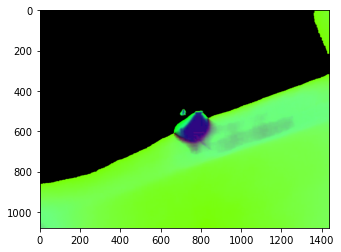

In [5]:
image_hsv = cv.cvtColor(image, cv.COLOR_RGB2HSV)
plt.imshow(image_hsv)

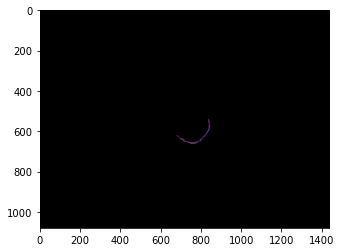

In [6]:
hsv_color_low = np.array([48, 23, 44])
hsv_color_high = np.array([103, 113, 138])

hsv_mask = cv.inRange(image_hsv, hsv_color_low, hsv_color_high)
hsv_getted = cv.bitwise_and(image_hsv, image_hsv, mask=hsv_mask)
plt.imshow(hsv_getted, 'gray')

(1080, 1439)


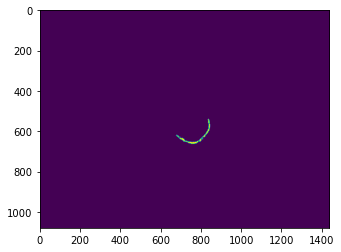

In [7]:
plt.imshow(hsv_mask)
Image.fromarray(hsv_mask).save('out1.jpg')
print(hsv_mask.shape)

(675, 620)


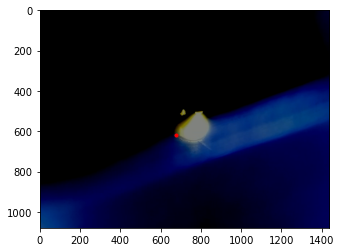

In [8]:
area_size = 0
point_left_bottom = (1439, 0)
y = 0

for row in hsv_mask:
    
    x = 0
    for point in row:
        if point:
            area_size += 1
            if x < point_left_bottom[0]: point_left_bottom = (x,y)

        x += 1

    y += 1

print(point_left_bottom)

plt.imshow(image)
plt.plot(point_left_bottom[0], point_left_bottom[1], 'r.')
plt.savefig('./output/result1.png', dpi=1200)

# Find the middle line

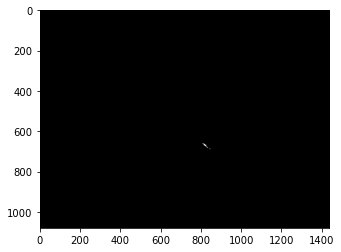

In [9]:
line_color_bottom = np.array([102, 91, 134])
line_color_top = np.array([112, 215, 146])

line_mask = cv.inRange(image_hsv, line_color_bottom, line_color_top)

plt.imshow(line_mask, 'gray')
plt.savefig('./output/link mask.png', dpi=1200)

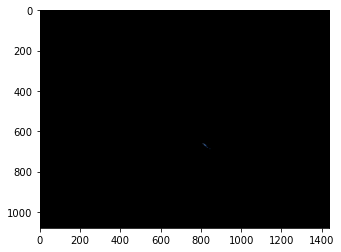

In [10]:
line_result = cv.bitwise_and(image, image,  mask=line_mask)
plt.imshow(line_result)

In [11]:
X, Y = [], []
y = 0
for row in line_mask:
    x = 0
    for point in row:
        if point:
            X.append([x])
            Y.append(y)

        x += 1
    y += 1

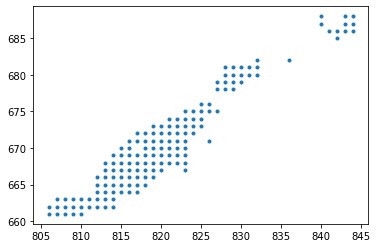

In [12]:
plt.plot(X, Y, '.')

(600.0, 700.0)

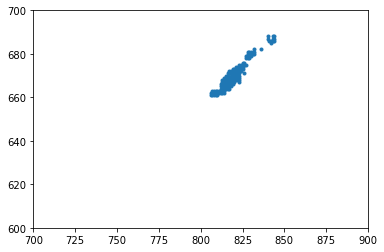

In [13]:
plt.plot(X, Y, '.')
plt.xlim(700, 900)
plt.ylim(600, 700)

In [14]:
lr_model = LinearRegression().fit(X, Y)
def line_fun(x):
    return lr_model.coef_ * x + lr_model.intercept_
def line_fun_y(y):
    return (y - lr_model.intercept_) / lr_model.coef_
x1, x2 = 775, 875
y1, y2 = line_fun(x1), line_fun(x2)
print(x1, y1)
print(x2, y2)

775 [636.03806783]
875 [712.42800874]


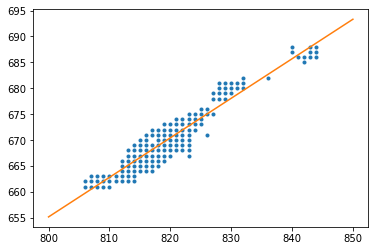

In [15]:
x3, x4 = 800, 850
y3, y4 = lr_model.predict([[x3]]), lr_model.predict([[x4]])
plt.plot(X, Y, '.')
plt.plot([x3, x4], [y3, y4], '-')
plt.savefig('output/plot1.jpg', dpi=1200)

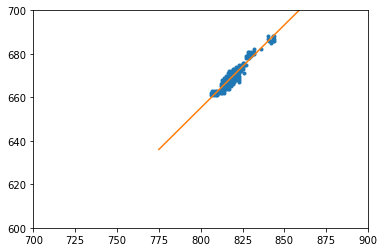

In [16]:
plt.plot(X, Y, '.')
plt.plot([x1, x2], [y1, y2], '-')
plt.xlim(700, 900)
plt.ylim(600, 700)
plt.savefig('output/plot2.jpg', dpi=1200)

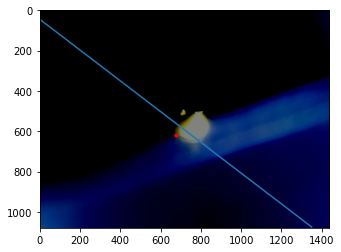

In [17]:
X1, X2 = 0, 1350
Y1, Y2 = lr_model.predict([[X1]])[0], lr_model.predict([[X2]])[0]

plt.imshow(image)
plt.plot([X1, X2], [Y1, Y2], '-')
plt.plot(point_left_bottom[0], point_left_bottom[1], 'r.')
plt.savefig('output/line.jpg', dpi = 1200)

In [18]:
print(point_left_bottom)
pointA = (point_left_bottom[0], line_fun(point_left_bottom[0])[0])
pointB = (line_fun_y(point_left_bottom[1])[0], point_left_bottom[1])
print(pointA, pointB)

(675, 620)
(675, 559.6481269071786) (754.0050003541327, 620)


In [19]:
a2b = ((pointA[0] - pointB[0]) ** 2 + (pointA[1] - pointB[1]) ** 2) ** 0.5
print(a2b)
coef = lr_model.coef_
result = a2b * coef / (coef ** 2 + 1)
print(result)

99.41900556115276
[47.95964039]


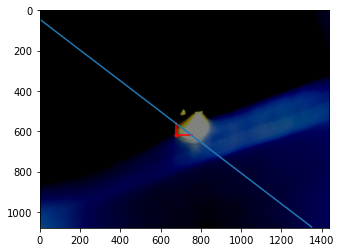

In [20]:
plt.imshow(image)
plt.plot([pointA[0], point_left_bottom[0], pointB[0]], [pointA[1], point_left_bottom[1], pointB[1]], 'r-')
plt.plot([X1, X2], [Y1, Y2], '-')
plt.plot(point_left_bottom[0], point_left_bottom[1], 'r.')
plt.savefig('output/result1.jpg', dpi = 1200)